# Telco Churn Project

In this project we are going to explore the telco database to determine why customers are churning.

# Goals

* Determine what the leading factors for churn are.

* Visualize and explore some of the data to gain a better understanding of it.

* Create a model that can help predict if a customer will churn.

* Organize information to present my findings and my models to the class.

# Overview

For this project we will be using the telco_churn database from CodeUp. Using Python and SQL we are going to pull the data from the
database. Then on Python, we will clean the data, explore it, and use machine learning to create some models that can help us predict churn. Here is a list of the steps covered in this notebook.

1. Acquire

2. Prepare

3. Explore

4. Model

5. Deploy/Present model

# Data Acquisition

First I will import useful data science and machine learning libraries as well as my acquire and prepare python files with some useful functions.

In [1]:
# importing useful data science libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# prepare and acquire are two python files I created with helpful functions for the project
import acquire as ac  
import prepare as prp

# importing machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# set seed number to be used for all random states so my results can be duplicated
seed=100

To pull the necessary data we can simply use this function.

In [2]:
# this function will query data from SQL or read it from a local .csv file
telco = ac.telco_data()
telco.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


NOTE: This acquire function drops 11 rows of data that contained empty total charges. Since there are over 7000 rows of data
these 11 rows should not affect anything.

In [3]:
# Data is pulled from SQL if a .csv file doesn't exist locally. Function will create a .csv file if one doesn't exist.

Now that we have acquired our data and assigned to a variable we can begin preparing it for exploration and modeling.

# Data Preparation

The first thing we want to do is to drop useless columns such as id numbers since they dont have any effect on churn, they
are only used to track information when stored into the database.

In [4]:
telco = telco.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id'])
telco.head(3) 

# The id # columns were dropped since they hold no value when it comes to determining churn.

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


Lets check for null values

In [5]:
telco.isna().sum() # sums all of the null values in each column

customer_id              0
gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
paperless_billing        0
monthly_charges          0
total_charges            0
churn                    0
contract_type            0
internet_service_type    0
payment_type             0
dtype: int64

There are no null values!

Now lets check what type of data I am working with.

In [6]:
telco.dtypes  # Checking the types of data I am working with.

customer_id               object
gender                    object
senior_citizen             int64
partner                   object
dependents                object
tenure                     int64
phone_service             object
multiple_lines            object
online_security           object
online_backup             object
device_protection         object
tech_support              object
streaming_tv              object
streaming_movies          object
paperless_billing         object
monthly_charges          float64
total_charges            float64
churn                     object
contract_type             object
internet_service_type     object
payment_type              object
dtype: object

All of these object data types must be converted to numeric data.

Finally, lets check how many unique values there are in each column

In [7]:
telco.nunique()  # Checking which columns have only 2 unique values so I can perform pd.getdummies on them.

customer_id              7032
gender                      2
senior_citizen              2
partner                     2
dependents                  2
tenure                     72
phone_service               2
multiple_lines              3
online_security             3
online_backup               3
device_protection           3
tech_support                3
streaming_tv                3
streaming_movies            3
paperless_billing           2
monthly_charges          1584
total_charges            6530
churn                       2
contract_type               3
internet_service_type       3
payment_type                4
dtype: int64

In [8]:
# ['gender', 'partner', 'dependents', 'phone_service', 'paperless_billing', 'churn']
# All of these features only have two possible unique values. This means we can drop a colum without losing information.
# Senior citizen is already in numeric format so we do not need to alter it.

For now, this is all we have to do in order to explore the data. When we begin modeling we will finish preparing our data to be used for modeling.

# Exploration

In this step we are going to just explore the data in whatever way we see fit in order to gain a better understanding of our data.

I have created a little list up here that I will be coming back to, in order to annotate my findings.

Important Features:

* Monthly charges

* Tenure

* Internet service type (Fiber optic has much higher churn rate)

* Partner

* Dependents

* Senior citizen

* Contract type (month-to-month customers churn way more than any other type of customer)

Not Important Features:

* Gender

* Phone service

For this portion of the project we will be performing some stats tests. I will determine our confidence interval here.

In [9]:
alpha = 0.05  # set confidence interval

def eval_p(p_value):  # create a function that checks p-value for a significant result.
    if p_value < alpha:
        print(f'There is a signifcant result. P-value was {p_value}.')
    else:
        print(f'There is no signifcant result. P-value was {round(p_value,2)}.')

### Does gender affect the churn rate in any way?

Using a countplot is a very good visual aid to quickly and clearly see patterns in your data.

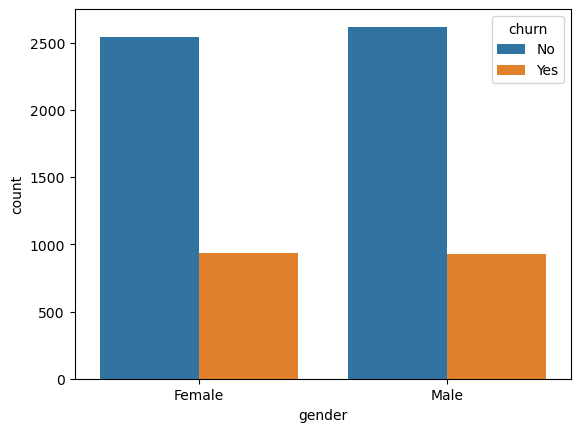

In [10]:
sns.countplot(data=telco, x='gender', hue='churn')
plt.show()
# creates a countplot with gender as the x-axis and y-axis is always the count.
# The graph creates two bars or different colors representing the 'hue' which in this case is churn

This graph counts the instances of churn or not churn for men and women. It is very clear that men and women churn at a very 
similar rate. Gender does not appear to have any significant role in churn.

We can perform a statistics test to be sure.

In [11]:
gender_ct = pd.crosstab(telco.gender, telco.churn)  # creates a crosstab of gender and churn
gender_ct

churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


In [12]:
chi2, p, degf, expected = stats.chi2_contingency(gender_ct)  # using chi square test we can get a p_value to determine significance.
eval_p(p)

There is no signifcant result. P-value was 0.49.


Conclusion: Gender does not have any correlation with churn. They are independent variables.

### Does tenure have any effect on churn rate?

For this feature we will sue a histogram with a hue of churn.

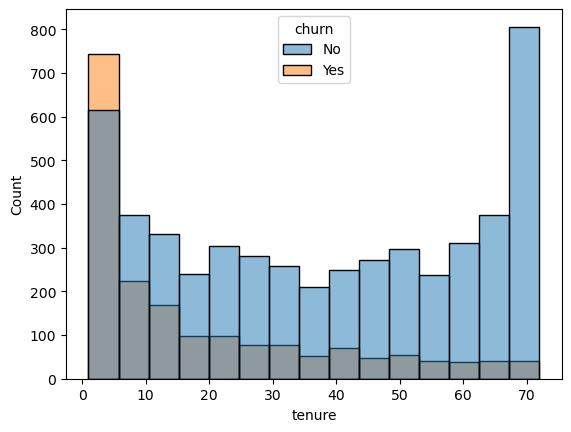

In [13]:
sns.histplot(data=telco, x='tenure', hue='churn') # creates histogram with hue of churn
plt.show()

We can immediately see that there seems to be a pattern where churn is much higher with customers that have low tenure.

Lets do a stats test.

We fist have to bin our data and then create a crosstab.

In [14]:
telco_tenure = telco.copy()  # first I will create a second copy of telco to modify
telco_tenure['tenure_bin'] = pd.cut(telco.tenure,2,labels=['low tenure','high tenure'])  # I bin tenure into either high or low.

ct_tenure = pd.crosstab(telco_tenure.tenure_bin,telco_tenure.churn)  # perform crosstab to see how many of each case there is
ct_tenure

churn,No,Yes
tenure_bin,,
low tenure,2520,1511
high tenure,2643,358


In [15]:
chi2, p, degf, expected = stats.chi2_contingency(ct_tenure)
eval_p(p)

There is a signifcant result. P-value was 6.1980638492128095e-127.


Conclusion: Tenure seems to have a correlation with churn. Customers with lower tenure churn at a higher rate than those with lower tenures.

### Do monthly charges have an effect on churn?

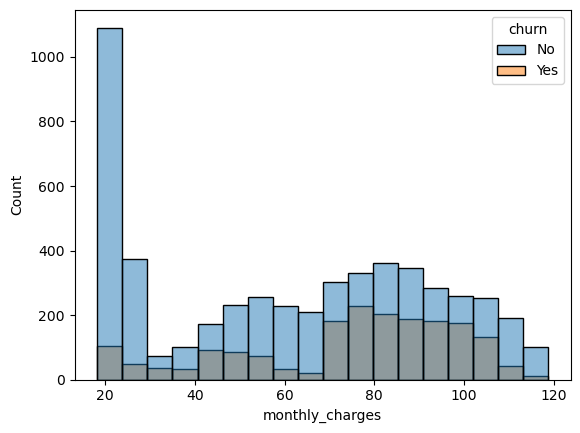

In [16]:
sns.histplot(data=telco, x='monthly_charges', hue='churn')
plt.show()
# creates another histogram to show monthly charges with a hue of 'churn'

Although not abundantly clear right away, it does seem that as charges go up, churn rate goes up as well.

Lets create a plot comparing monthly charges, tenure and churn, to see if we can identify any patterns.

<Axes: xlabel='tenure', ylabel='monthly_charges'>

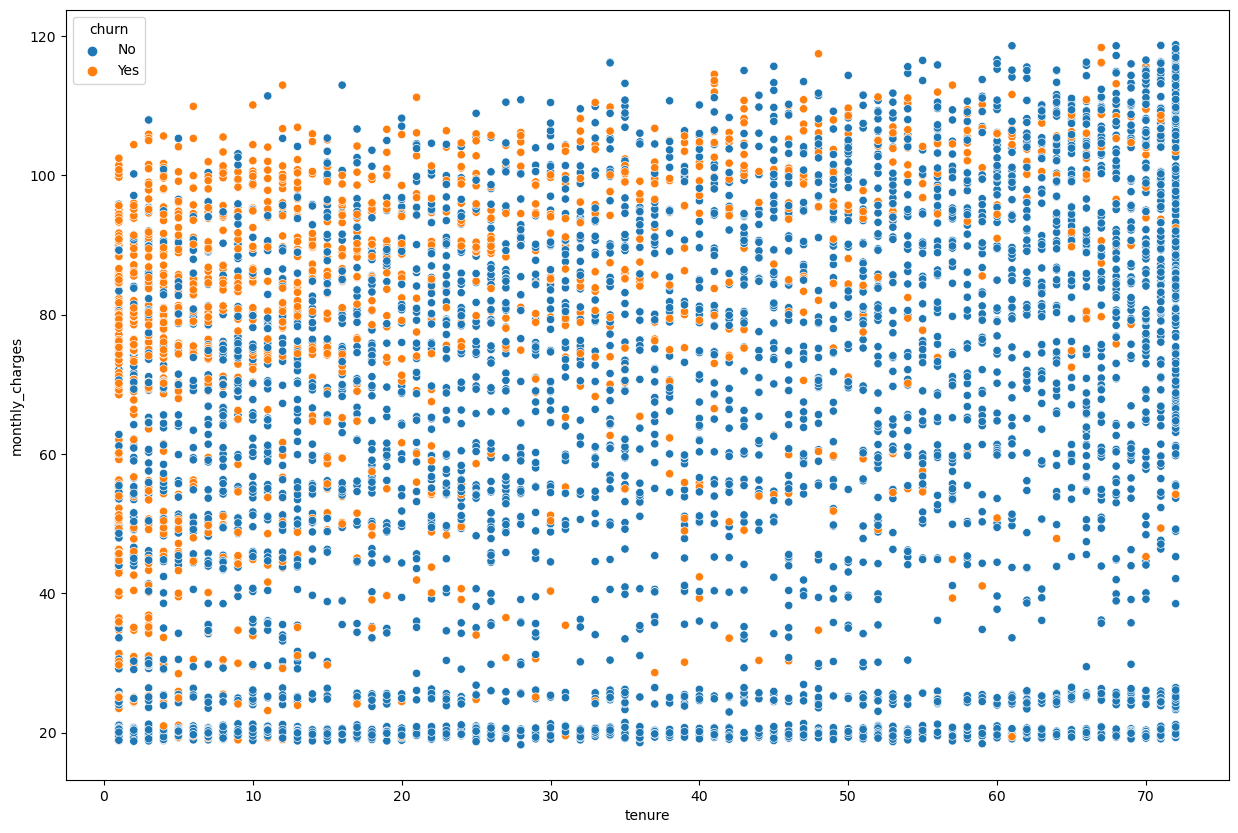

In [17]:
plt.figure(figsize=(15, 10)) # creating a larger figure size for the graph
sns.scatterplot(data=telco, x='tenure', y='monthly_charges', hue='churn') # plotting tenure vs monthly charges color coded by hue

We can see there is a higher concentration of orange dots indicating churn in the top left, where the low tenure, high monthly charges area is.

### Does internet service type have any effect on churn?

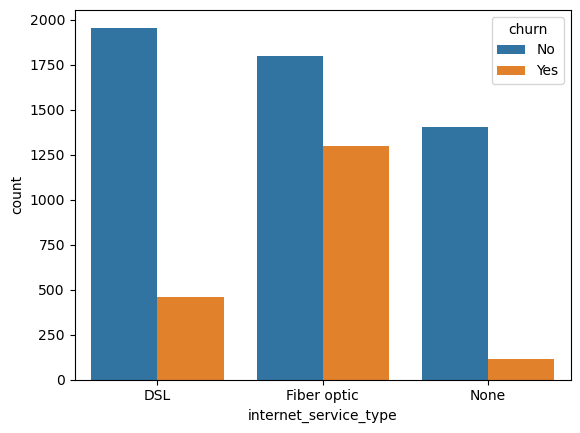

In [18]:
sns.countplot(data=telco, x='internet_service_type', hue='churn')
plt.show() # plotting countplot for internet type

Fiber optic seems to have a disproportionaly high churn rate compared to 'None' and 'DSL'

In [19]:
ct_net = pd.crosstab(telco.internet_service_type, telco.churn)
ct_net  # create crosstab for stats test

churn,No,Yes
internet_service_type,,
DSL,1957,459
Fiber optic,1799,1297
None,1407,113


In [20]:
chi2, p, degf, expected = stats.chi2_contingency(ct_net)  # perform test
eval_p(p) # evaluate test results

There is a signifcant result. P-value was 5.831198962237274e-159.


There is a correlation between internet service type and churn. Customers with fiber optic seem to churn at a higher 
rate than those with no internet or DSL

### Does contract type have an influence on churn?

As we saw before, customers with low tenure have have higher churn rates, so lets see if shorter contracts have higher churn
rates than longer contracts.

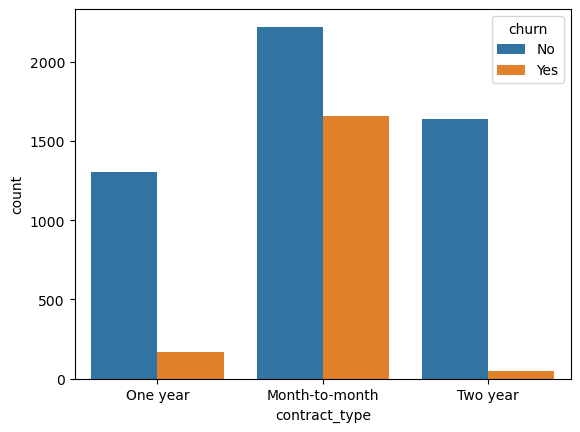

In [21]:
sns.countplot(data=telco, x='contract_type', hue='churn') # create plot for contract type
plt.show()

Contract type seems to have the strongest correlation with churn so far. People who are on a month-to-month contract churn significantly 
more often than any other contract type.

In [22]:
contract_ct = pd.crosstab(telco.contract_type, telco.churn) # create crosstab for contract type and churn
contract_ct

churn,No,Yes
contract_type,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


In [23]:
chi2, p, degf, expected = stats.chi2_contingency(ct_net)  # perform stats test and evaluate results
eval_p(p)

There is a signifcant result. P-value was 5.831198962237274e-159.


Lets further explore this by creating two subgroups of customers with and without monthly contracts

In [24]:
mm_telco = telco[telco.contract_type == 'Month-to-month']
nmm_telco = telco[telco.contract_type != 'Month-to-month']

# I created two smaller data frames separating month to month from the rest of customers to graph them separately

<Axes: xlabel='monthly_charges', ylabel='Count'>

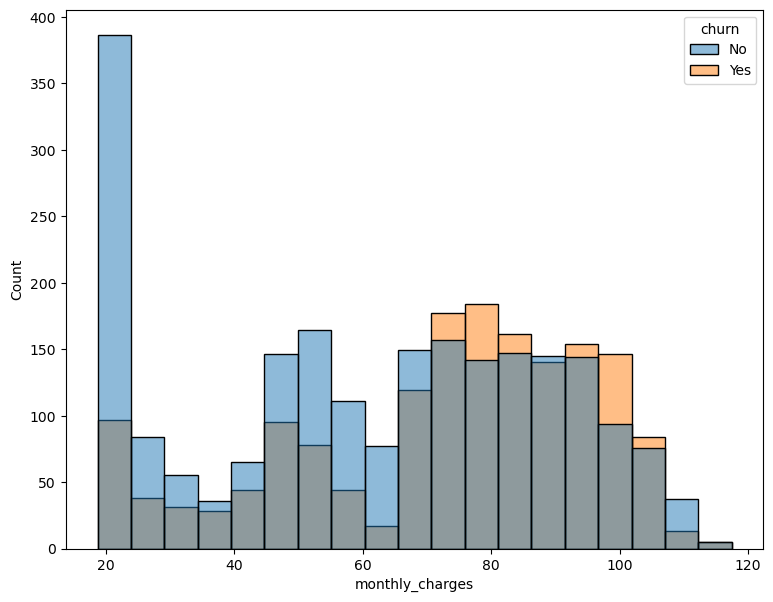

In [25]:
plt.figure(figsize=(9, 7))
sns.histplot(data=mm_telco, x='monthly_charges', hue='churn') # plot churn for customers with  monthly contracts

<Axes: xlabel='monthly_charges', ylabel='Count'>

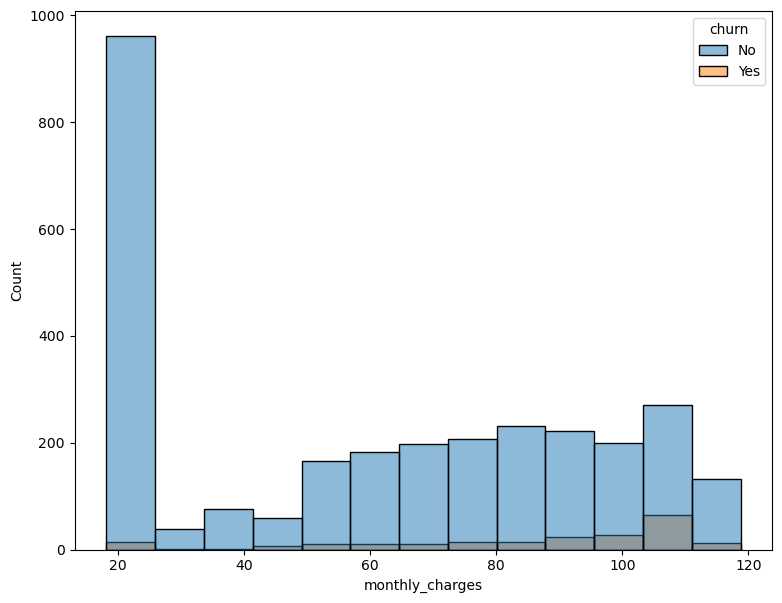

In [26]:
plt.figure(figsize=(9, 7))
sns.histplot(data=nmm_telco, x='monthly_charges', hue='churn') # plot churn for customers with non monthly contracts

Conclusion: Contract type has a massive effect on churn. Customers with month-to-month internet churn much more often than those under longer contracts.

Exploration findings:
    
It seems that the main driving factors of churn are contract type, monthly charges, tenure and internet type.

Other factors have a much less meaningful impact on churn.

# Modeling

In this phase of our project we will build some models that can help us predict churn

First we have to convert all of our object data types to numerical data. For this we can use pd.getdummies.

In [27]:
telco = pd.get_dummies(telco, columns=['gender', 'partner', 'dependents', 'phone_service', # creating dummy values 
                                    'paperless_billing', 'churn'], drop_first=True) # dropping first value since colums only have two values

Now I will rename them to make the table a little cleaner.

In [28]:
rename = {'gender_Male':'male', 'partner_Yes':'partner', 'dependents_Yes':'dependents',
          'phone_service_Yes':'phone_service', 'paperless_billing_Yes':'paperless_billing', 'churn_Yes':'churn'}

# I will rename the columns to something a little more concise.

telco = telco.rename(columns=rename)
telco.head(3)

,customer_id,senior_citizen,tenure,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,...,total_charges,contract_type,internet_service_type,payment_type,male,partner,dependents,phone_service,paperless_billing,churn
0,0002-ORFBO,0,9,No,No,Yes,No,Yes,Yes,No,...,593.30,One year,DSL,Mailed check,0,1,1,1,1,0
1,0003-MKNFE,0,9,Yes,No,No,No,No,No,Yes,...,542.40,Month-to-month,DSL,Mailed check,1,0,0,1,0,0
2,0004-TLHLJ,0,4,No,No,No,Yes,No,No,No,...,280.85,Month-to-month,Fiber optic,Electronic check,1,0,0,1,1,1


Now we can drop a few more columns and get dummies for the others.

In [29]:
telco = telco.drop(columns=['streaming_tv', 'streaming_movies']) # dropping these two columns that seemed to have little impact on churn
telco = pd.get_dummies(telco, columns=['multiple_lines', 'online_security', 'online_backup', 'device_protection',
                                       'tech_support', 'contract_type', 'internet_service_type', 'payment_type'])
telco.head()  # creating dummies for the rest of the columns

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,male,partner,dependents,phone_service,paperless_billing,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,0,9,65.6,593.30,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,0,9,59.9,542.40,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,1,0,0,1,1,...,1,0,0,0,1,0,0,0,1,0
3,0011-IGKFF,1,13,98.0,1237.85,1,1,0,1,1,...,1,0,0,0,1,0,0,0,1,0
4,0013-EXCHZ,1,3,83.9,267.40,0,1,0,1,1,...,1,0,0,0,1,0,0,0,0,1


Dummies creates duplicate values for no internet and phone service so I will use a for loop to find them and then delete them.

In [30]:
to_delete = []

for col in telco.columns:
    if 'No internet service' in col or 'No phone service' in col:
        to_delete.append(col)

to_delete  
# i use a for loop to identify all columns that are names 'No ...' since they are redundant and there is already a column for that

['multiple_lines_No phone service',
 'online_security_No internet service',
 'online_backup_No internet service',
 'device_protection_No internet service',
 'tech_support_No internet service']

Delete and rename more columns

In [31]:
telco = telco.drop(columns=to_delete)  # drop the columns

new_names = {'contract_type_Month-to-month':'monthly_contract','contract_type_One year':'year_contract',
             'contract_type_Two year':'two_year_contract', 'internet_service_type_DSL':'DSL',
             'internet_service_type_Fiber optic':'Fiber_optic','internet_service_type_None':'No_internet',
             'payment_type_Bank transfer (automatic)':'bank_transfer_pay','payment_type_Credit card (automatic)':'credit_card_pay',
             'payment_type_Electronic check':'e-check_pay', 'payment_type_Mailed check':'mailed_check'}

telco = telco.rename(columns=new_names)  # renaming some of the other columns to something more concise and clear

Next, I can delete some of the 'no..' columns since there is only yes and no so they are repetitive. Then I will rename some more columns

In [32]:
telco = telco.drop(columns=['multiple_lines_No', 'online_security_No', 'online_backup_No','device_protection_No', 'tech_support_No'])
# I am going to delete these columns since only one is needed since there is only yes/no for this data

In [33]:
to_rename= []

for col in telco.columns:
    if 'Yes' in col:
        to_rename.append(col)

to_rename  # finding cells with 'Yes' to rename them in order to make the columns a bit cleaner

['multiple_lines_Yes',
 'online_security_Yes',
 'online_backup_Yes',
 'device_protection_Yes',
 'tech_support_Yes']

In [34]:
names = {'multiple_lines_Yes':'multiple_lines',
         'online_security_Yes':'online_security',
         'online_backup_Yes':'online_backup',
         'device_protection_Yes':'device_protection',
         'tech_support_Yes':'tech_support'}
# create dictionary for renaming
telco = telco.rename(columns=names)

Checking data types of each column  and number of unique values to ensure table is ready for modeling

In [35]:
for col in telco.columns:
    print(f' {col}   {telco[col].nunique()} ')

 customer_id   7032 
 senior_citizen   2 
 tenure   72 
 monthly_charges   1584 
 total_charges   6530 
 male   2 
 partner   2 
 dependents   2 
 phone_service   2 
 paperless_billing   2 
 churn   2 
 multiple_lines   2 
 online_security   2 
 online_backup   2 
 device_protection   2 
 tech_support   2 
 monthly_contract   2 
 year_contract   2 
 two_year_contract   2 
 DSL   2 
 Fiber_optic   2 
 No_internet   2 
 bank_transfer_pay   2 
 credit_card_pay   2 
 e-check_pay   2 
 mailed_check   2 


In [36]:
telco.head(3)

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,male,partner,dependents,phone_service,paperless_billing,...,monthly_contract,year_contract,two_year_contract,DSL,Fiber_optic,No_internet,bank_transfer_pay,credit_card_pay,e-check_pay,mailed_check
0,0002-ORFBO,0,9,65.6,593.30,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,0,9,59.9,542.40,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,0,4,73.9,280.85,1,0,0,1,1,...,1,0,0,0,1,0,0,0,1,0


Our table is not ready for modeling.

## Decision tree

The decision tree model was not as good as the other ones but it was helpful in creating a list of importance with I could use to remove some features for later models

In [37]:
telco = ac.telco_data()  # retrieve data
telco = prp.prep_telco(telco)  # prep data using function that does everything done above
telco.head(3)

train, val, test = prp.train_val_test(telco,'churn',seed=100)  # split data into 3 sets


train, customer_id_train = prp.split_x_y(train,'customer_id')   # remove customer id from sample now that is has been split
val, customer_id_val = prp.split_x_y(val,'customer_id')
test, customer_id_test = prp.split_x_y(test,'customer_id')

x_train, y_train = prp.split_x_y(train,'churn')  # split data to remove the target variable churn
x_val, y_val = prp.split_x_y(val,'churn')
x_test, y_test = prp.split_x_y(test,'churn')

train.shape, val.shape, test.shape 

((4922, 25), (1055, 25), (1055, 25))

In [38]:
clf = DecisionTreeClassifier(max_depth=7, min_samples_split=10, random_state=seed)
clf.fit(x_train, y_train)
cols = list(prp.importance(x_train, clf).cols)
cols[:5]

['monthly_contract',
 'tenure',
 'Fiber_optic',
 'total_charges',
 'monthly_charges']

## Random Forest

First lets use the functions we have to pull our data and then split it and then separate the customer id number and finally split
it into our x and y train, validate, and test.

In [39]:
telco = ac.telco_data()  # retrieve data
telco = prp.prep_telco(telco)  # prep data using function that does everything done above
telco.head(3)

train, val, test = prp.train_val_test(telco,'churn',seed=100)  # split data into 3 sets


train, customer_id_train = prp.split_x_y(train,'customer_id')   # remove customer id from sample now that is has been split
val, customer_id_val = prp.split_x_y(val,'customer_id')
test, customer_id_test = prp.split_x_y(test,'customer_id')

x_train, y_train = prp.split_x_y(train,'churn')  # split data to remove the target variable churn
x_val, y_val = prp.split_x_y(val,'churn')
x_test, y_test = prp.split_x_y(test,'churn')

train.shape, val.shape, test.shape 

((4922, 25), (1055, 25), (1055, 25))

Lets calculate our baseline model.

In [40]:
prp.baseline(train,'churn',1) # calculates baseline

Baseline accuracy is: 73.43%.
Baseline recall is: 0.0%.
Baseline precision is: 0.0%.



With random forest, models take significantly longer to create and train so I will have to limit the number of models created

In [41]:
# Create empty lists to append with every loops pass

model_num = []
depth = []
accuracy_train = []
accuracy_val = []
samples = []
max_feat = []
min_split = []
trees = []
gen = 1


# by chaining several for loops together I can create hundreds of models and test different hyperparameters at once.

for t in range(50,105,25):
    for f in range(7,10,1):
        for s in range(7,11,1):
            for i in range(2,9,2):
                for n in range(8,11):
                    rf1 = RandomForestClassifier(n_estimators=t, max_depth=n, min_samples_leaf=i, 
                                                 min_samples_split=s, max_features=f, random_state=seed)
                    rf1.fit(x_train, y_train)
                    model_num.append(f'Model {gen}')
                    depth.append(n)
                    min_split.append(s)
                    samples.append(i)
                    max_feat.append(f)
                    trees.append(t)
                    accuracy_train.append(rf1.score(x_train, y_train))
                    accuracy_val.append(rf1.score(x_val, y_val))
                    gen += 1


# create a dictionary from lists appended during looping
models = {'model_num':model_num,
          'depth':depth,
          'samples':samples,
          'min_splits':min_split,
          'max_features':max_feat,
          'trees':trees,
          'accuracy_train':accuracy_train,
          'accuracy_val':accuracy_val}

models = pd.DataFrame(models).sort_values(by='accuracy_val', ascending=False).head(5)
models
# call model ordered by top 5 to see best performance

,model_num,depth,samples,min_splits,max_features,trees,accuracy_train,accuracy_val
79,Model 80,9,6,9,8,50,0.847217,0.811374
91,Model 92,9,6,10,8,50,0.847217,0.811374
67,Model 68,9,6,8,8,50,0.847217,0.811374
55,Model 56,9,6,7,8,50,0.847217,0.811374
199,Model 200,9,6,7,8,75,0.848232,0.810427


After creating many, many models. This is the best performing one.

In [42]:
rf1 = RandomForestClassifier(n_estimators=50, max_depth=9, min_samples_leaf=6,
                                                 min_samples_split=9, max_features=8, random_state=seed) # create model
rf1.fit(x_train, y_train)  # train model
rf1.score(x_train, y_train), rf1.score(x_val, y_val), rf1.score(x_test, y_test)  # score model

(0.8472165786265745, 0.8113744075829384, 0.795260663507109)

After running statistics, our random forest model had decent accuracy at around 80% but poor precision and recall score.

In [43]:
forest = rf1.predict(x_test)  # storing test results
forest_prob = rf1.predict_proba(x_test)  # storing test results

In [44]:
print(classification_report(y_test, forest))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       775
           1       0.64      0.53      0.58       280

    accuracy                           0.80      1055
   macro avg       0.74      0.71      0.72      1055
weighted avg       0.79      0.80      0.79      1055



## KNN

For knn first we will need to adjust our numerical values to a range of 0-1.

In [45]:
mms = MinMaxScaler() # create object
for col in ['tenure', 'monthly_charges', 'total_charges']:  # use for loop to iterate through all columns in all data
    x_train[[col]] = mms.fit_transform(x_train[[col]])
    x_val[[col]] = mms.transform(x_val[[col]])
    x_test[[col]] = mms.transform(x_test[[col]])
    
x_train.head()

,senior_citizen,tenure,monthly_charges,total_charges,male,partner,dependents,phone_service,paperless_billing,multiple_lines,...,monthly_contract,year_contract,two_year_contract,DSL,Fiber_optic,No_internet,bank_transfer_pay,credit_card_pay,e-check_pay,mailed_check
3421,0,0.169014,0.552239,0.108217,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
110,0,0.126761,0.666667,0.096521,1,1,0,1,1,1,...,1,0,0,0,1,0,0,0,1,0
4358,0,0.985915,0.355224,0.446552,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
6856,0,0.676056,0.489055,0.379416,0,0,0,1,0,0,...,0,0,1,1,0,0,1,0,0,0
1938,0,0.690141,0.011443,0.115983,0,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0


Now we can loop through creating some different models to see which is best!

In [46]:
# create empty lists
model_num = []
neighbors = []
leaf = []
weight = []
accuracy_train = []
accuracy_val = []
gen = 1

# dropping the 15 least important features
least_important=cols[-15:]

x_train = x_train.drop(columns=least_important)
x_val = x_val.drop(columns=least_important)
x_test = x_test.drop(columns=least_important)

#  create for loops to test out several hyperparameters
for w in ['uniform']:
    for l in range(30,60,3):
        for n in range(1,40):
            knn = KNeighborsClassifier(n_neighbors=n, weights=w, leaf_size=l)
            knn.fit(x_train, y_train)

            model_num.append(f'Model {gen}')
            neighbors.append(n)
            leaf.append(l)
            weight.append(w)
            accuracy_train.append(knn.score(x_train, y_train))
            accuracy_val.append(knn.score(x_val, y_val))
            gen += 1


# create dictionary for dataframe
models = {'model_num':model_num,
          'neighbors':neighbors,
          'leaf':leaf,
          'weights':weight,
          'accuracy_train':accuracy_train,
          'accuracy_val':accuracy_val}

# create df
models = pd.DataFrame(models).sort_values(by='accuracy_val', ascending=False)
models.head()

,model_num,neighbors,leaf,weights,accuracy_train,accuracy_val
293,Model 294,21,51,uniform,0.811052,0.803791
371,Model 372,21,57,uniform,0.811052,0.803791
332,Model 333,21,54,uniform,0.811052,0.803791
254,Model 255,21,48,uniform,0.811052,0.803791
215,Model 216,21,45,uniform,0.811052,0.803791


Lets create our best model

In [47]:
knn = KNeighborsClassifier(n_neighbors=21, weights='uniform', leaf_size=39) # creating best model
knn.fit(x_train, y_train) # fit model
knn.score(x_train, y_train), knn.score(x_val, y_val), knn.score(x_test, y_test) # score the model

(0.8110524177163755, 0.8037914691943128, 0.7933649289099526)

In [48]:
neighbor = knn.predict(x_test)  # storing test results
neighbor_prob = knn.predict_proba(x_test)  # storing test results

Once again the best model has accuracy around 80% but poor precision and recal.

In [49]:
print(classification_report(y_test, neighbor))  # score the model

              precision    recall  f1-score   support

           0       0.84      0.90      0.86       775
           1       0.64      0.51      0.57       280

    accuracy                           0.79      1055
   macro avg       0.74      0.70      0.72      1055
weighted avg       0.78      0.79      0.79      1055



## Logistic Regression

We need to reset our train, val and test values to have all columns again

In [50]:
telco = ac.telco_data()  # retrieve data
telco = prp.prep_telco(telco)  # prep data using function that does everything done above
telco.head(3)

train, val, test = prp.train_val_test(telco,'churn',seed=100)  # split data into 3 sets


train, customer_id_train = prp.split_x_y(train,'customer_id')   # remove customer id from sample now that is has been split
val, customer_id_val = prp.split_x_y(val,'customer_id')
test, customer_id_test = prp.split_x_y(test,'customer_id')

x_train, y_train = prp.split_x_y(train,'churn')  # split data to remove the target variable churn
x_val, y_val = prp.split_x_y(val,'churn')
x_test, y_test = prp.split_x_y(test,'churn')

train.shape, val.shape, test.shape 

((4922, 25), (1055, 25), (1055, 25))

 I will create a function to create train and check logistic regression models with different features

In [51]:
placeholder = telco.copy()  # create a temporary variable to hold the train datraframe.

def check_model(columns):  # function takes in list of columns 
    new_df = pd.DataFrame()
    new_df['churn'] = placeholder['churn']

    for n in columns:   # creates df of only columns passed into function
        new_df[n] = placeholder[n]
    new_df
    
    train, val, test = prp.train_val_test(new_df,'churn')  # train, val, test split new df
    x_train, y_train = prp.split_x_y(train,'churn')
    x_val, y_val = prp.split_x_y(val,'churn')
    
    logreg = LogisticRegression(random_state = seed, max_iter = 400)  # create and train model
    
    logreg.fit(x_train, y_train)

    return logreg.score(x_train, y_train), logreg.score(x_val, y_val)  # score model

This is the list of importance of features created earlier.

In [52]:
cols[:5] # check contents of list

['monthly_contract',
 'tenure',
 'Fiber_optic',
 'total_charges',
 'monthly_charges']

Using a for loop we can test the number of features the models perform best on

In [53]:
number = 1  # create variable to count number of features
for i in range(1,len(cols)+1):  # use a for loop to iterate through the number of features our list
    columns = cols[:i]
    print(f'{number}  {check_model(columns)}')
    number += 1

1  (0.7342543681430312, 0.7336492890995261)
2  (0.7594473791141813, 0.7601895734597156)
3  (0.7887037789516457, 0.7848341232227488)
4  (0.78992279561154, 0.7838862559241706)
5  (0.7895164567249086, 0.7886255924170616)
6  (0.7895164567249086, 0.7829383886255924)
7  (0.7919544900446973, 0.7924170616113744)
8  (0.7966273872409589, 0.8009478672985783)
9  (0.7962210483543275, 0.8085308056872038)
10  (0.7988622511174319, 0.8028436018957346)
11  (0.8031288094270622, 0.7933649289099526)
12  (0.8004876066639578, 0.7886255924170616)
13  (0.8037383177570093, 0.7924170616113744)
14  (0.8063795205201137, 0.790521327014218)
15  (0.8063795205201137, 0.795260663507109)
16  (0.8067858594067452, 0.7981042654028436)
17  (0.800284437220642, 0.7962085308056872)
18  (0.8065826899634295, 0.7971563981042654)
19  (0.8059731816334823, 0.7981042654028436)
20  (0.8055668427468509, 0.7990521327014218)
21  (0.8051605038602194, 0.7962085308056872)
22  (0.8073953677366924, 0.7962085308056872)
23  (0.8061763510767981,

The model with the 15 top features performed better than the rest

By copying some of the code from the function I can create our new model and test it

In [54]:
new_df = pd.DataFrame()
new_df['churn'] = placeholder['churn']

for n in cols[:15]:
    new_df[n] = placeholder[n]
new_df
    
train, val, test = prp.train_val_test(new_df,'churn')
x_train, y_train = prp.split_x_y(train,'churn')
x_val, y_val = prp.split_x_y(val,'churn')
x_test, y_test = prp.split_x_y(test,'churn')  # create train, test, val of 15 features
    
logreg = LogisticRegression(random_state = seed, max_iter = 400) # create model
    
logreg.fit(x_train, y_train) # fit model

logreg.score(x_train, y_train), logreg.score(x_val, y_val), logreg.score(x_test, y_test) # score

(0.8063795205201137, 0.795260663507109, 0.8009478672985783)

Looks like this model performs around 80% accuracy on our test sample.

In [55]:
logic = logreg.predict(x_test)  # storing test results
logic_prob = logreg.predict_proba(x_test)  # storing test results

Once again the best model has accuracy around 80% but poor precision and recal.

In [56]:
print(classification_report(y_test, logic))  # score the model

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       775
           1       0.65      0.54      0.59       280

    accuracy                           0.80      1055
   macro avg       0.75      0.72      0.73      1055
weighted avg       0.79      0.80      0.79      1055



Since this is the best model lets save the data into a .csv file.

In [57]:
probability = pd.DataFrame(logic_prob)  # creates dataframe of probability

# create dataframe using dictionary
predictions = pd.DataFrame({'customer_id':list(customer_id_test),
                            'probability_of_churn':probability[1],
                            'prediction_of_churn':logic})

In [58]:
predictions.head()

,customer_id,probability_of_churn,prediction_of_churn
0,8582-KRHPJ,0.080193,0
1,0854-UYHZD,0.028892,0
2,6859-QNXIQ,0.049225,0
3,0533-BNWKF,0.409750,0
4,7587-AOVVU,0.289843,0


In [59]:
predictions.to_csv('predictions.csv',index=False) # export .csv file

We can also plot the results on a graph for a better visualization.

In [60]:
results = pd.DataFrame({'actual':y_test,  # create a dictionary to convert do dataframe
                        'model':logic})

This graph shows the results of our model. It does very well at identifying negatives but not nearly as well at identifying positives.

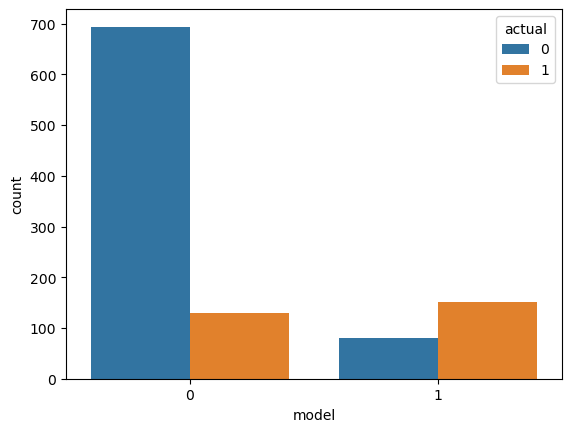

In [61]:
sns.countplot(data=results, x='model', hue='actual') # create model results graph
plt.show()

# Conclusion

We succesfully completed our goals of this project. Through exploration of our data, by graphing and performing statistical analysis we were able to determine the main driving factors correlated to churn, which are contract type, tenure, monthly charges, and internet type. Several models were created but the best one can identify churn with around 80% accuracy.

Lessons learned: Spending too much time fine tuning your model is not always worth your time. Next time, I would instead spend a bit more time testing out how the model performs with different features, by removing features that may just be adding unnecessary data to the model.